<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Part%202/Lesson%202/Lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

#  Линейная регрессия

Хотим аппроксимировать набор точек прямой линией

Создадим случайный точки

In [0]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,1].uniform_(-1.,1)
x[:5]

tensor([[ 1.0000, -0.3698],
        [ 1.0000,  0.8098],
        [ 1.0000, -0.2843],
        [ 1.0000,  0.4560],
        [ 1.0000, -0.7618]])

In [4]:
w = tensor(3.,2); w

tensor([3., 2.])

In [0]:
y = x@w + torch.rand(n)

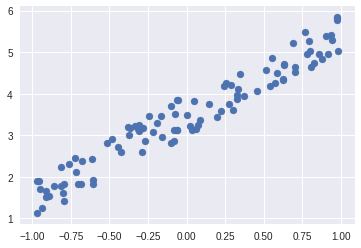

In [6]:
plt.scatter(x[:,1], y);

Хотим найти **параметры** (веса) `w` такие, чтобы минимизировать *ошибку* между реальными значениями *y_hat* и предсказаниями *y = x@w*. В качестве функции ошибок используем **среднеквадратическое отклонение**

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
w = tensor(5.,-1.)

In [9]:
y_hat = x@w
mse(y_hat, y)

tensor(5.4447)

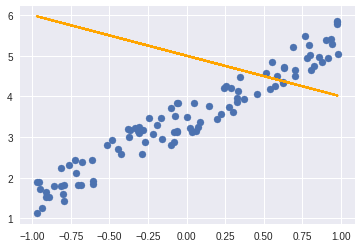

In [10]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],y_hat, color='orange');

# Градиентный спуск

In [0]:
def update1(w):
  y_hat = x@w
  loss = mse(y, y_hat)
  if t % 10 == 0: print(loss)
  grad_w = (x@w - y)@x
  grad_w = grad_w/grad_w.norm()
  with torch.no_grad():
    w-=lr*grad_w

In [12]:
w = tensor(5.,-1)
lr = 5e-2
for t in range(100): 
  update1(w)

tensor(5.4447)
tensor(3.8009)
tensor(2.5228)
tensor(1.5697)
tensor(0.8912)
tensor(0.4372)
tensor(0.1747)
tensor(0.0923)
tensor(0.0927)
tensor(0.0927)


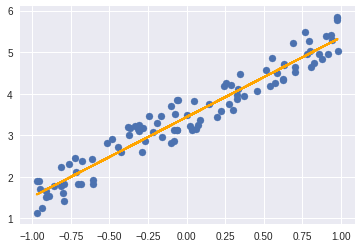

In [13]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],x@w, c='orange');

## Анимация

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [17]:
w = tensor(5.,-1)
lr = 5e-2
fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
line, = plt.plot(x[:,1], x@w)
plt.close()

def animate(i):
    update1(w)
    line.set_ydata(x@w)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

#Домашнее задание - реализовать стохастический градиентный спуск

Идея очень простая - на каждом шаге считаем градиент не по всем точкам, а по случайно выборке из них. Напишите код и посмотрите, как влияет на обучение размер выборки, соотношение шага и размера выборки

# Нейросеть

In [0]:
N, D_in, H, D_out = 100, 1, 50, 1
x = torch.ones(N,D_in+1) 
x[:,1].uniform_(-1.,1)
y = (x[:,1]**3 + x[:,1]**2 -x[:,1] - 1 + torch.ones(N).uniform_(-1,1)*0.2).unsqueeze(1)
W1 = torch.ones(D_in+1, H).uniform_(-1.,1)
W2 = torch.ones(H, D_out).uniform_(-1.,1)
relu = torch.nn.ReLU()

In [0]:
with torch.no_grad():
  for t in range(20001):

    h = 1/(1+torch.exp(-x@W1))
    y_pred = (h@W2)
    loss = mse(y, y_pred)
    if t%1000==0: print(t,loss)

    grad_y_pred = 2*(y_pred-y)
    grad_W2 = (torch.transpose(h,0,1)@grad_y_pred); grad_W2 = grad_W2/grad_W2.norm()
    grad_h = grad_y_pred@torch.transpose(W2,0,1)
    grad_W1 = torch.transpose(x,0,1)@(grad_h*h*(1-h)); grad_W1 = grad_W1/grad_W1.norm()

    W1-=1e-3*grad_W1
    W2-=1e-3*grad_W2

0 tensor(1.6247)
1000 tensor(0.1194)
2000 tensor(0.0688)
3000 tensor(0.0339)
4000 tensor(0.0229)
5000 tensor(0.0162)
6000 tensor(0.0143)
7000 tensor(0.0141)
8000 tensor(0.0140)
9000 tensor(0.0140)
10000 tensor(0.0140)
11000 tensor(0.0139)
12000 tensor(0.0139)
13000 tensor(0.0139)
14000 tensor(0.0139)
15000 tensor(0.0139)
16000 tensor(0.0139)
17000 tensor(0.0138)
18000 tensor(0.0138)
19000 tensor(0.0138)
20000 tensor(0.0138)


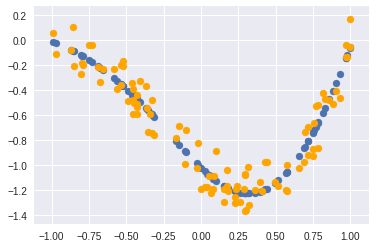

In [0]:
plt.scatter(x[:,1],y_pred)
plt.scatter(x[:,1],y,color='orange')

In [0]:
h.shape

torch.Size([100, 10])

In [0]:
torch.transpose(h,0,1).shape

torch.Size([10, 100])